# Import your needed libraries in this cell

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt
from matplotlib.pyplot import contour

from sklearn.datasets import load_breast_cancer
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#(Import library, object creation, fitting model and prediction)

#Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm, datasets,metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint


from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

# Import Dataset

In [2]:
#path = os.getcwd() + '\test.txt'
data = pd.read_excel('test.xlsx', header=None, names=['x1', 'x2', 'x3','Class','L'])  
data

,x1,x2,x3,Class,L
0,55572.527016,165.140216,158.186448,1,4.0
1,50563.670573,164.915815,157.943743,1,4.4
2,42842.584076,164.546532,157.549211,1,5.2
3,39804.256129,164.415426,157.416770,1,5.6
4,32823.074090,164.108120,157.093743,1,6.8
...,...,...,...,...,...
2199,2688.373175,2240.398062,2103.742525,10,146.4
2200,2680.736844,2234.401339,2097.728184,10,146.8
2201,2665.245904,2222.485267,2085.599344,10,147.6
2202,2657.256463,2216.552138,2079.406716,10,148.0


# Data Preprocessing

In [101]:

#X.data.shape
pdList = data['x1'].to_frame()  # List of your dataframes
yy = pdList.join(data['x2'], lsuffix='_caller', rsuffix='_other')
yy  = yy.join(data['x3'], lsuffix='_caller', rsuffix='_other')

y = data['Class']
st_x = preprocessing.scale(yy)
#st_x = yy
#print(st_x)
y.shape
y2 = y[0:1088]
st_x2=st_x[0:1088]
y3 = y[1089:2204]
st_x3=st_x[1089:2204]


y2.shape
st_x2.shape

print(st_x,y)
print(st_x[947],y[947])


[[ 5.23292329 -0.50761117 -0.49209932]
 [ 4.71423414 -0.50763831 -0.49212966]
 [ 3.9146816  -0.50768296 -0.49217899]
 ...
 [-0.24585882 -0.25884807 -0.25112487]
 [-0.24668616 -0.25956547 -0.2518991 ]
 [-0.24849552 -0.26101166 -0.25355257]] 0        1
1        1
2        1
3        1
4        1
        ..
2199    10
2200    10
2201    10
2202    10
2203    10
Name: Class, Length: 2204, dtype: int64
[-0.50572731  0.01716379  0.03305416] 5


# Test accuracy of SVM kernels

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into the Training set and Test set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)
#from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(clf, X, y, cv=50)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C=1

# we create an instance of SVM and fit out data.
model = svm.SVC(kernel='linear', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of linear kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='rbf',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of rbf kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='poly',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of poly kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='sigmoid',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of sigmoid kernel SVC with Cross Validation is:",accuracy.mean() * 100)

Accuracy of linear kernel SVC with Cross Validation is: 73.57957937252164
Accuracy of rbf kernel SVC with Cross Validation is: 70.26411912288711
Accuracy of poly kernel SVC with Cross Validation is: 29.111977945387345
Accuracy of sigmoid kernel SVC with Cross Validation is: 63.560315177742545


# Find optimum hyperparameters for each kernel by using random search algorithm

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X1 = svc_param_selection(st_x, y, 50)
print(X1)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X2 = svc_param_selection(st_x, y, 50)
print(X2)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X3 = svc_param_selection(st_x, y, 50)
print(X3)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X4 = svc_param_selection(st_x, y, 50)
print(X4)

# Find accuracy of linear kernel SVC with Cross Validation

In [68]:
model = svm.SVC(kernel='rbf', C=1000,gamma=0.1)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of linear kernel SVC with Cross Validation is:",accuracy.mean() * 100)
print(st_x)

Accuracy of linear kernel SVC with Cross Validation is: 99.2373717985819
[[ 5.23292329 -0.50761117 -0.49209932]
 [ 4.71423414 -0.50763831 -0.49212966]
 [ 3.9146816  -0.50768296 -0.49217899]
 ...
 [-0.24585882 -0.25884807 -0.25112487]
 [-0.24668616 -0.25956547 -0.2518991 ]
 [-0.24849552 -0.26101166 -0.25355257]]


Testing 

In [102]:
tester = SVC(kernel='rbf', C=1000,gamma=0.1)
#tester = svm.SVC(kernel='linear', C=1000,gamma=0.000001)
tester.fit(st_x, y)
print(tester.predict([[-0.50572731,  0.01716379 , 0.03305416]]))



[5]


In [98]:
st_xxxx = preprocessing.scale([[-0.50541617, -0.50675486, -0.30521778]])

print(st_xxxx)


[[0. 0. 0.]]


In [ ]:
y.shape
st_x2[:, :3]

In [ ]:
print(np.unique(y))

No handles with labels found to put in legend.


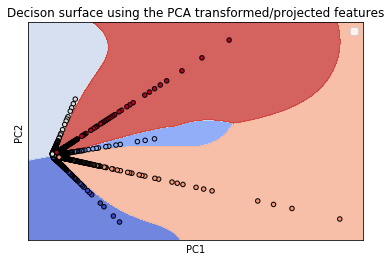

In [6]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

X = st_x2[:, :3]  
y = y2

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf',C = 1000, gamma = 0.1)
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()


No handles with labels found to put in legend.


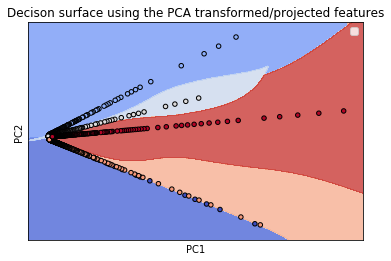

In [5]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

X = st_x3[:, :3]  
y = y3

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf',C = 1000, gamma = 0.1)
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

In [78]:
#Seond part
#X.data.shape
First = data['x1'].to_frame()  # List of your dataframes
second = First.join(data['x2'], lsuffix='_caller', rsuffix='_other')
third  = second.join(data['x3'], lsuffix='_caller', rsuffix='_other')
group  = third.join(data['Class'], lsuffix='_caller', rsuffix='_other')


lables = data['L'].ravel()
st_x1 = preprocessing.scale(group)
#st_x = yy
#print(st_x)
#y.shape
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(lables)
print(lables)
print(group)
#print(lables.ravel().shape)
#print(group.shape)


[  4.    4.4   5.2 ... 147.6 148.  148.8]
                x1           x2           x3  Class
0     55572.527016   165.140216   158.186448      1
1     50563.670573   164.915815   157.943743      1
2     42842.584076   164.546532   157.549211      1
3     39804.256129   164.415426   157.416770      1
4     32823.074090   164.108120   157.093743      1
...            ...          ...          ...    ...
2199   2688.373175  2240.398062  2103.742525     10
2200   2680.736844  2234.401339  2097.728184     10
2201   2665.245904  2222.485267  2085.599344     10
2202   2657.256463  2216.552138  2079.406716     10
2203   2639.783925  2204.591684  2066.181615     10

[2204 rows x 4 columns]


In [79]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


X = group
y = lables.ravel()
from sklearn.svm import SVR
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)



svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.001)


svr_rbf.fit(X,y)
confidence = svr_rbf.score(xtest, ytest)


clf = svm.SVR()
clf.fit(X,y)
clf.score(X,y)

#print(confidence)
#print("Accuracy: %.3f (%.3f)") % (svr_rbf.mean(), svr_rbf.std())
from sklearn.metrics import r2_score

regressor=SVR(kernel='rbf',epsilon=1.0,C=60, gamma=0.00001)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)
#print(regressor.score(xtest,ytest))
#print(r2_score(ytest,pred))
#print(ytest)
print(pred[100])
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(ytest, pred))
print(metrics.mean_squared_error(ytest, pred))
print(np.sqrt(metrics.mean_squared_error(ytest, pred)))
###############################################################################
# look at the results
#y_pred = svr_rbf.predict(6.5)

C:\Users\anwer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


140.19830291665593
2.963240116588233
36.38629692557678
6.03210551346516


In [103]:
pred=regressor.predict([[155.7253299,4536.29554,4389.657875,5]])
print(pred)
#print(ytest)155.7253299,4536.29554,4389.657875,5


[55.80169992]
